In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 325 (delta 152), reused 118 (delta 118), pack-reused 123
Receiving objects: 100% (325/325), 2.26 MiB | 35.65 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:0

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Mar 22 13:11 .
drwxr-xr-x 1 root root      4096 Mar 22 13:11 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!unzip -q /content/detect.v1i.yolov8.zip

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source /content/yolov9/data.yaml --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/yolov9/data.yaml, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
Traceback (most recent call last):
  File "/content/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov9/det

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 15 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-22 13:15:52.225314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 13:15:52.225361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 13:15:52.226761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 13:15:53.334675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/data.yaml, hyp=hyp.scratch-high.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, n

In [11]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1711113249.8f169ded6765.3006.0  labels.jpg	      train_batch1.jpg
hyp.yaml					    opt.yaml	      train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


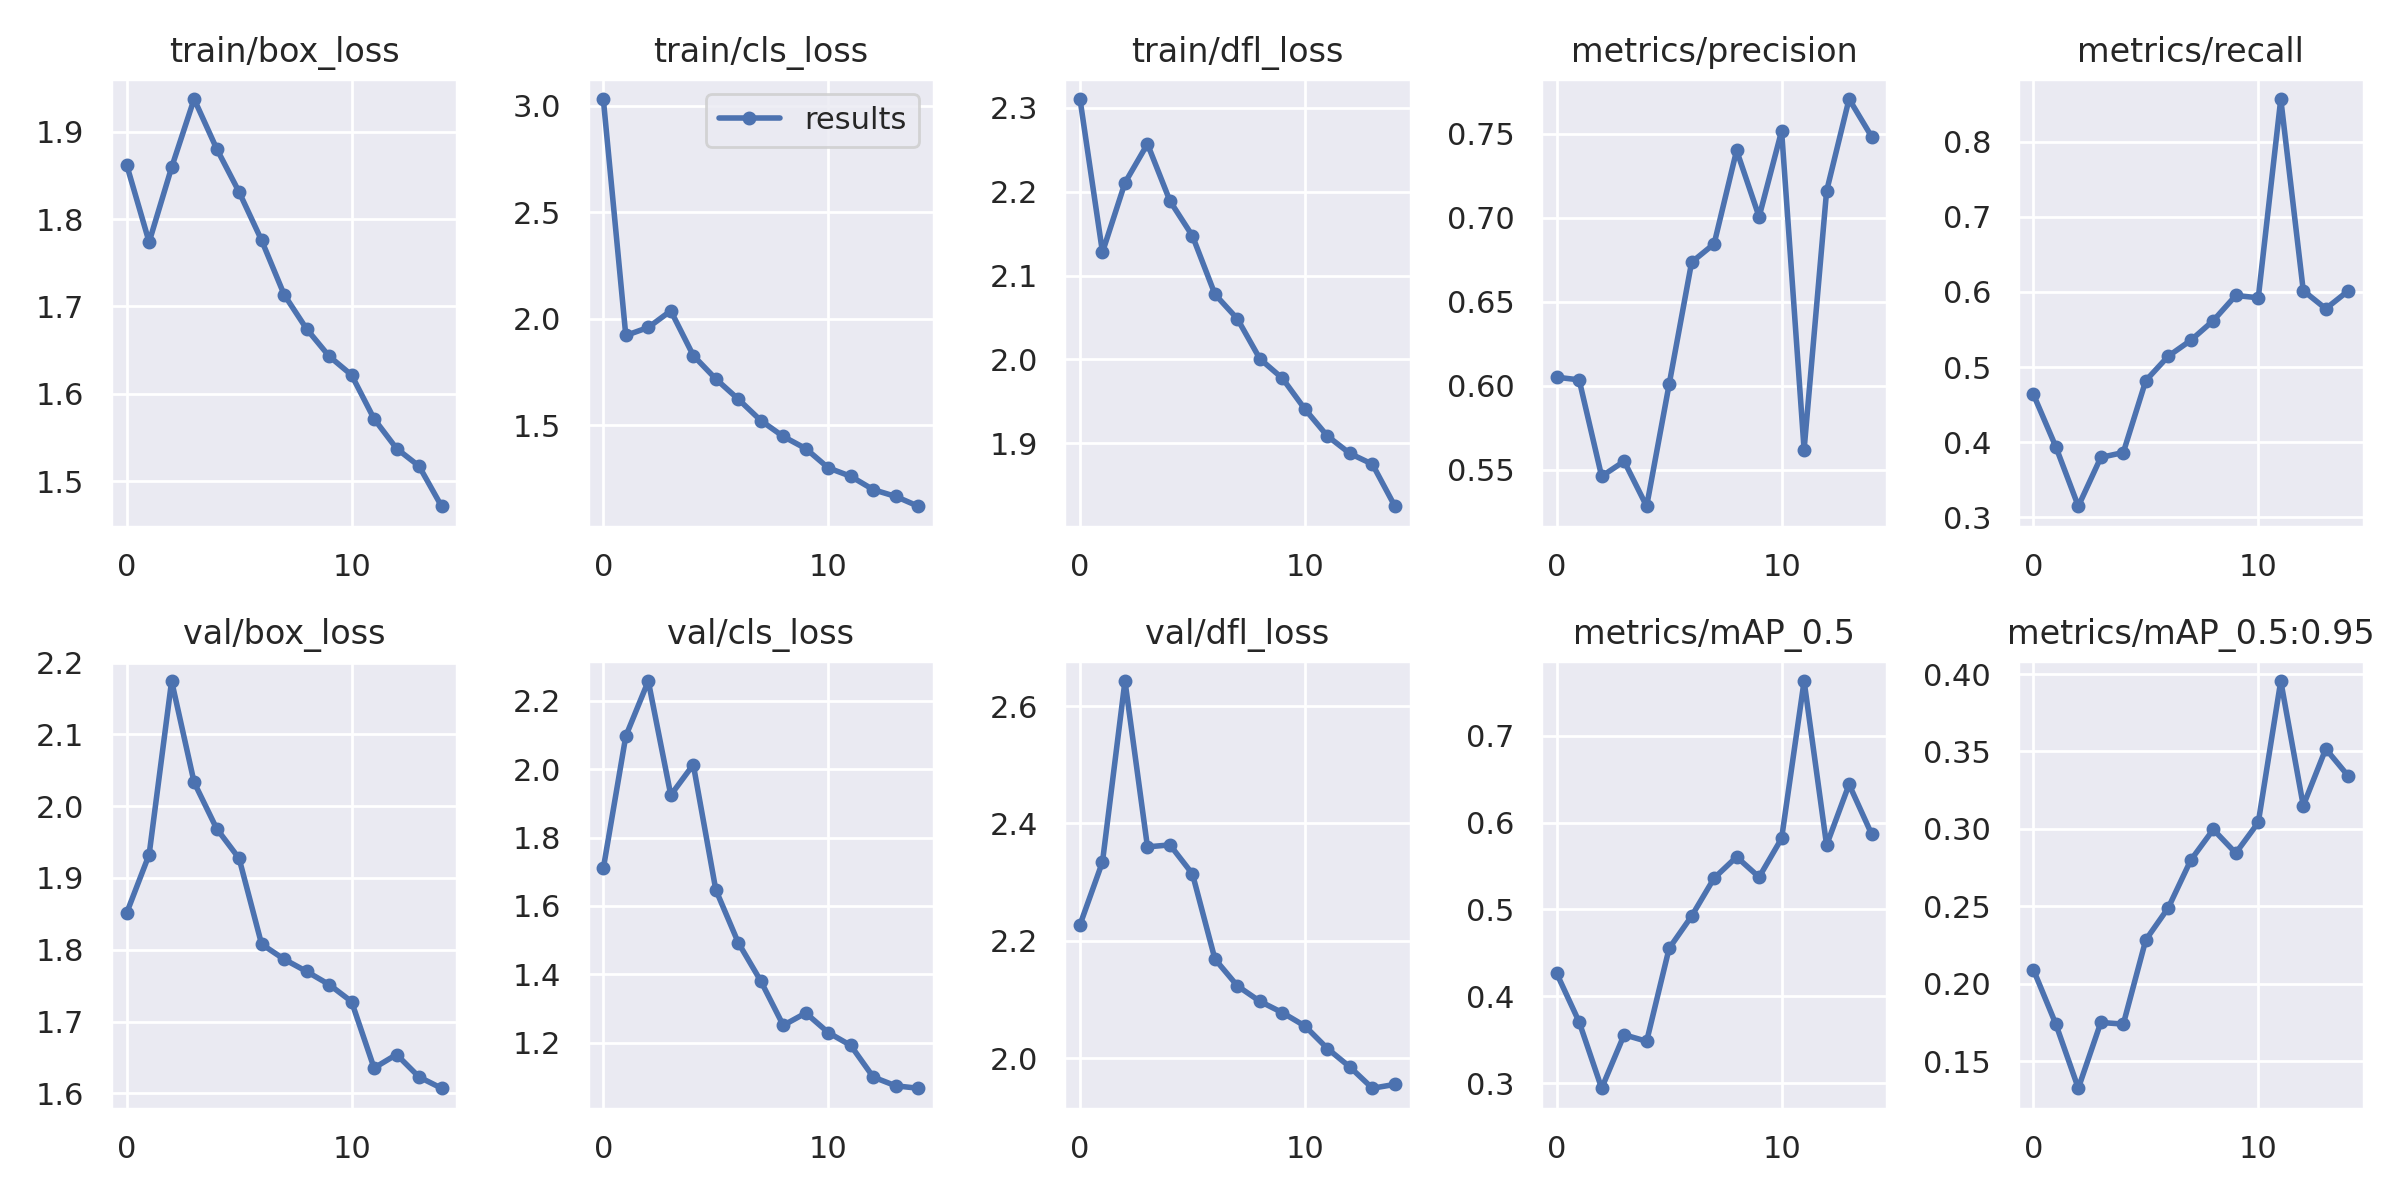

In [14]:
from IPython.display import Image as IPImage

# Display the image with a width of 1000 pixels
IPImage(filename="/content/yolov9/runs/train/exp2/results.png", width=1000)

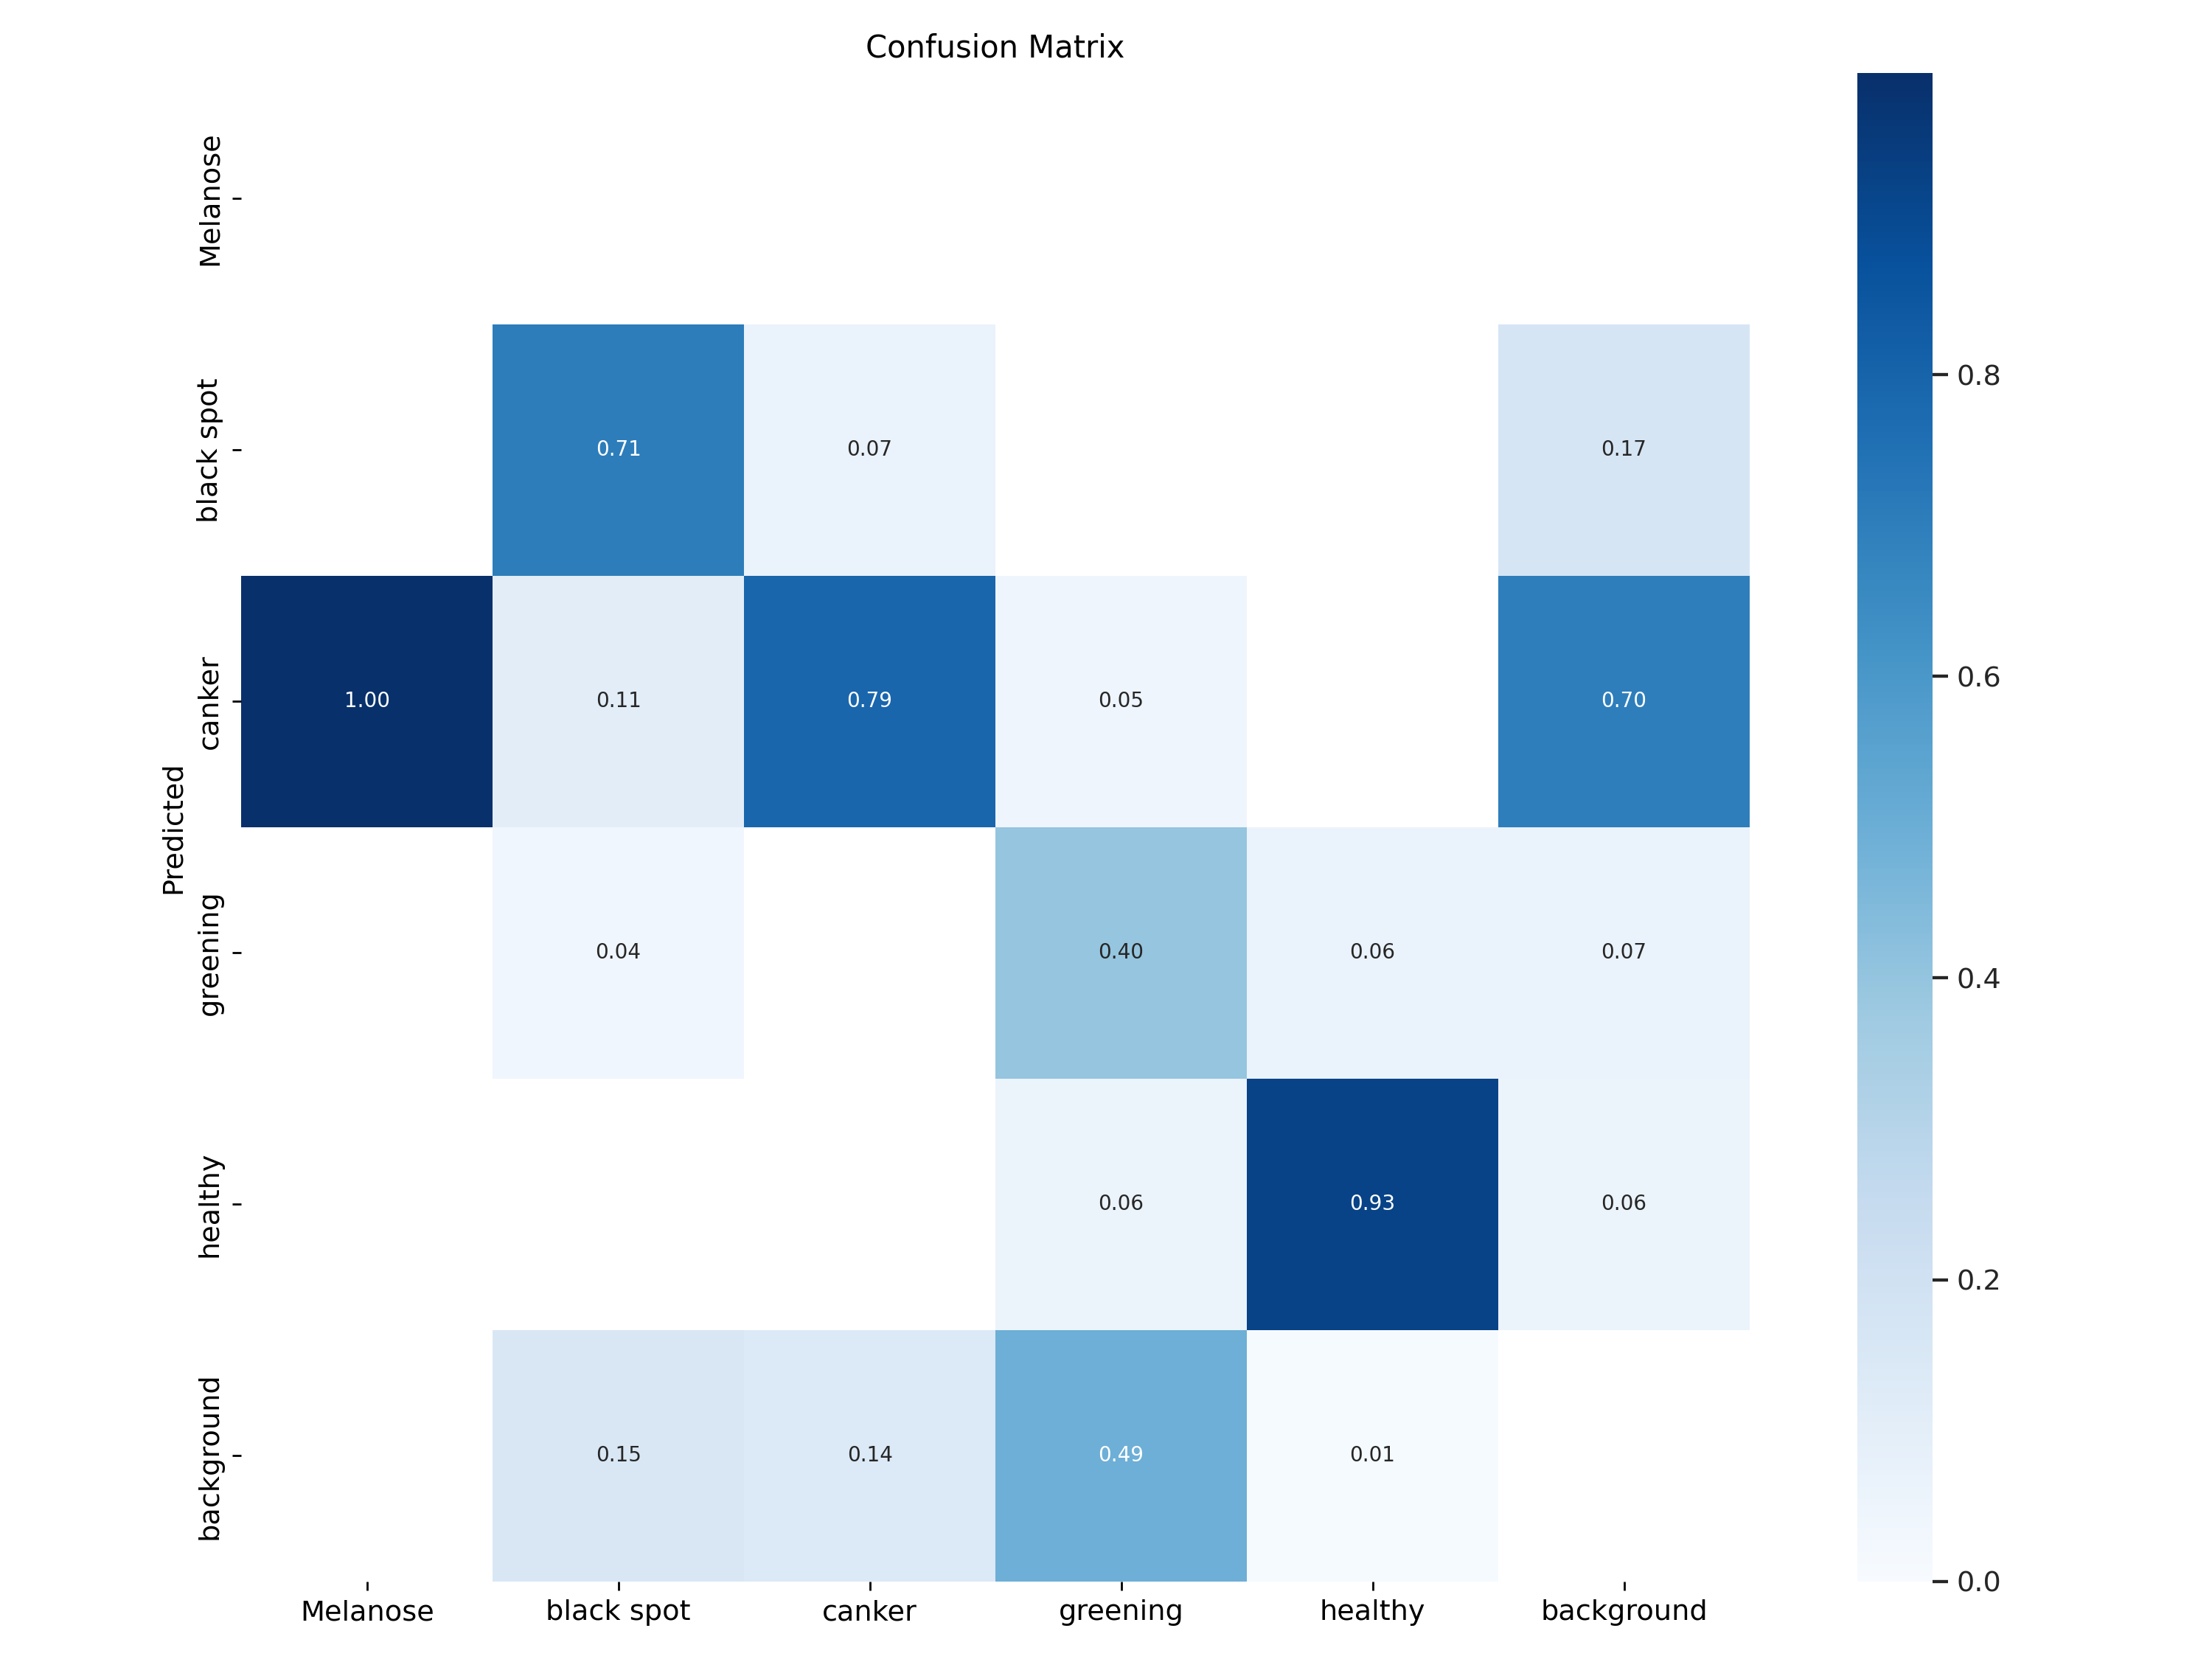

In [15]:
from IPython.display import Image as IPImage

# Display the image with a width of 1000 pixels
IPImage(filename="/content/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

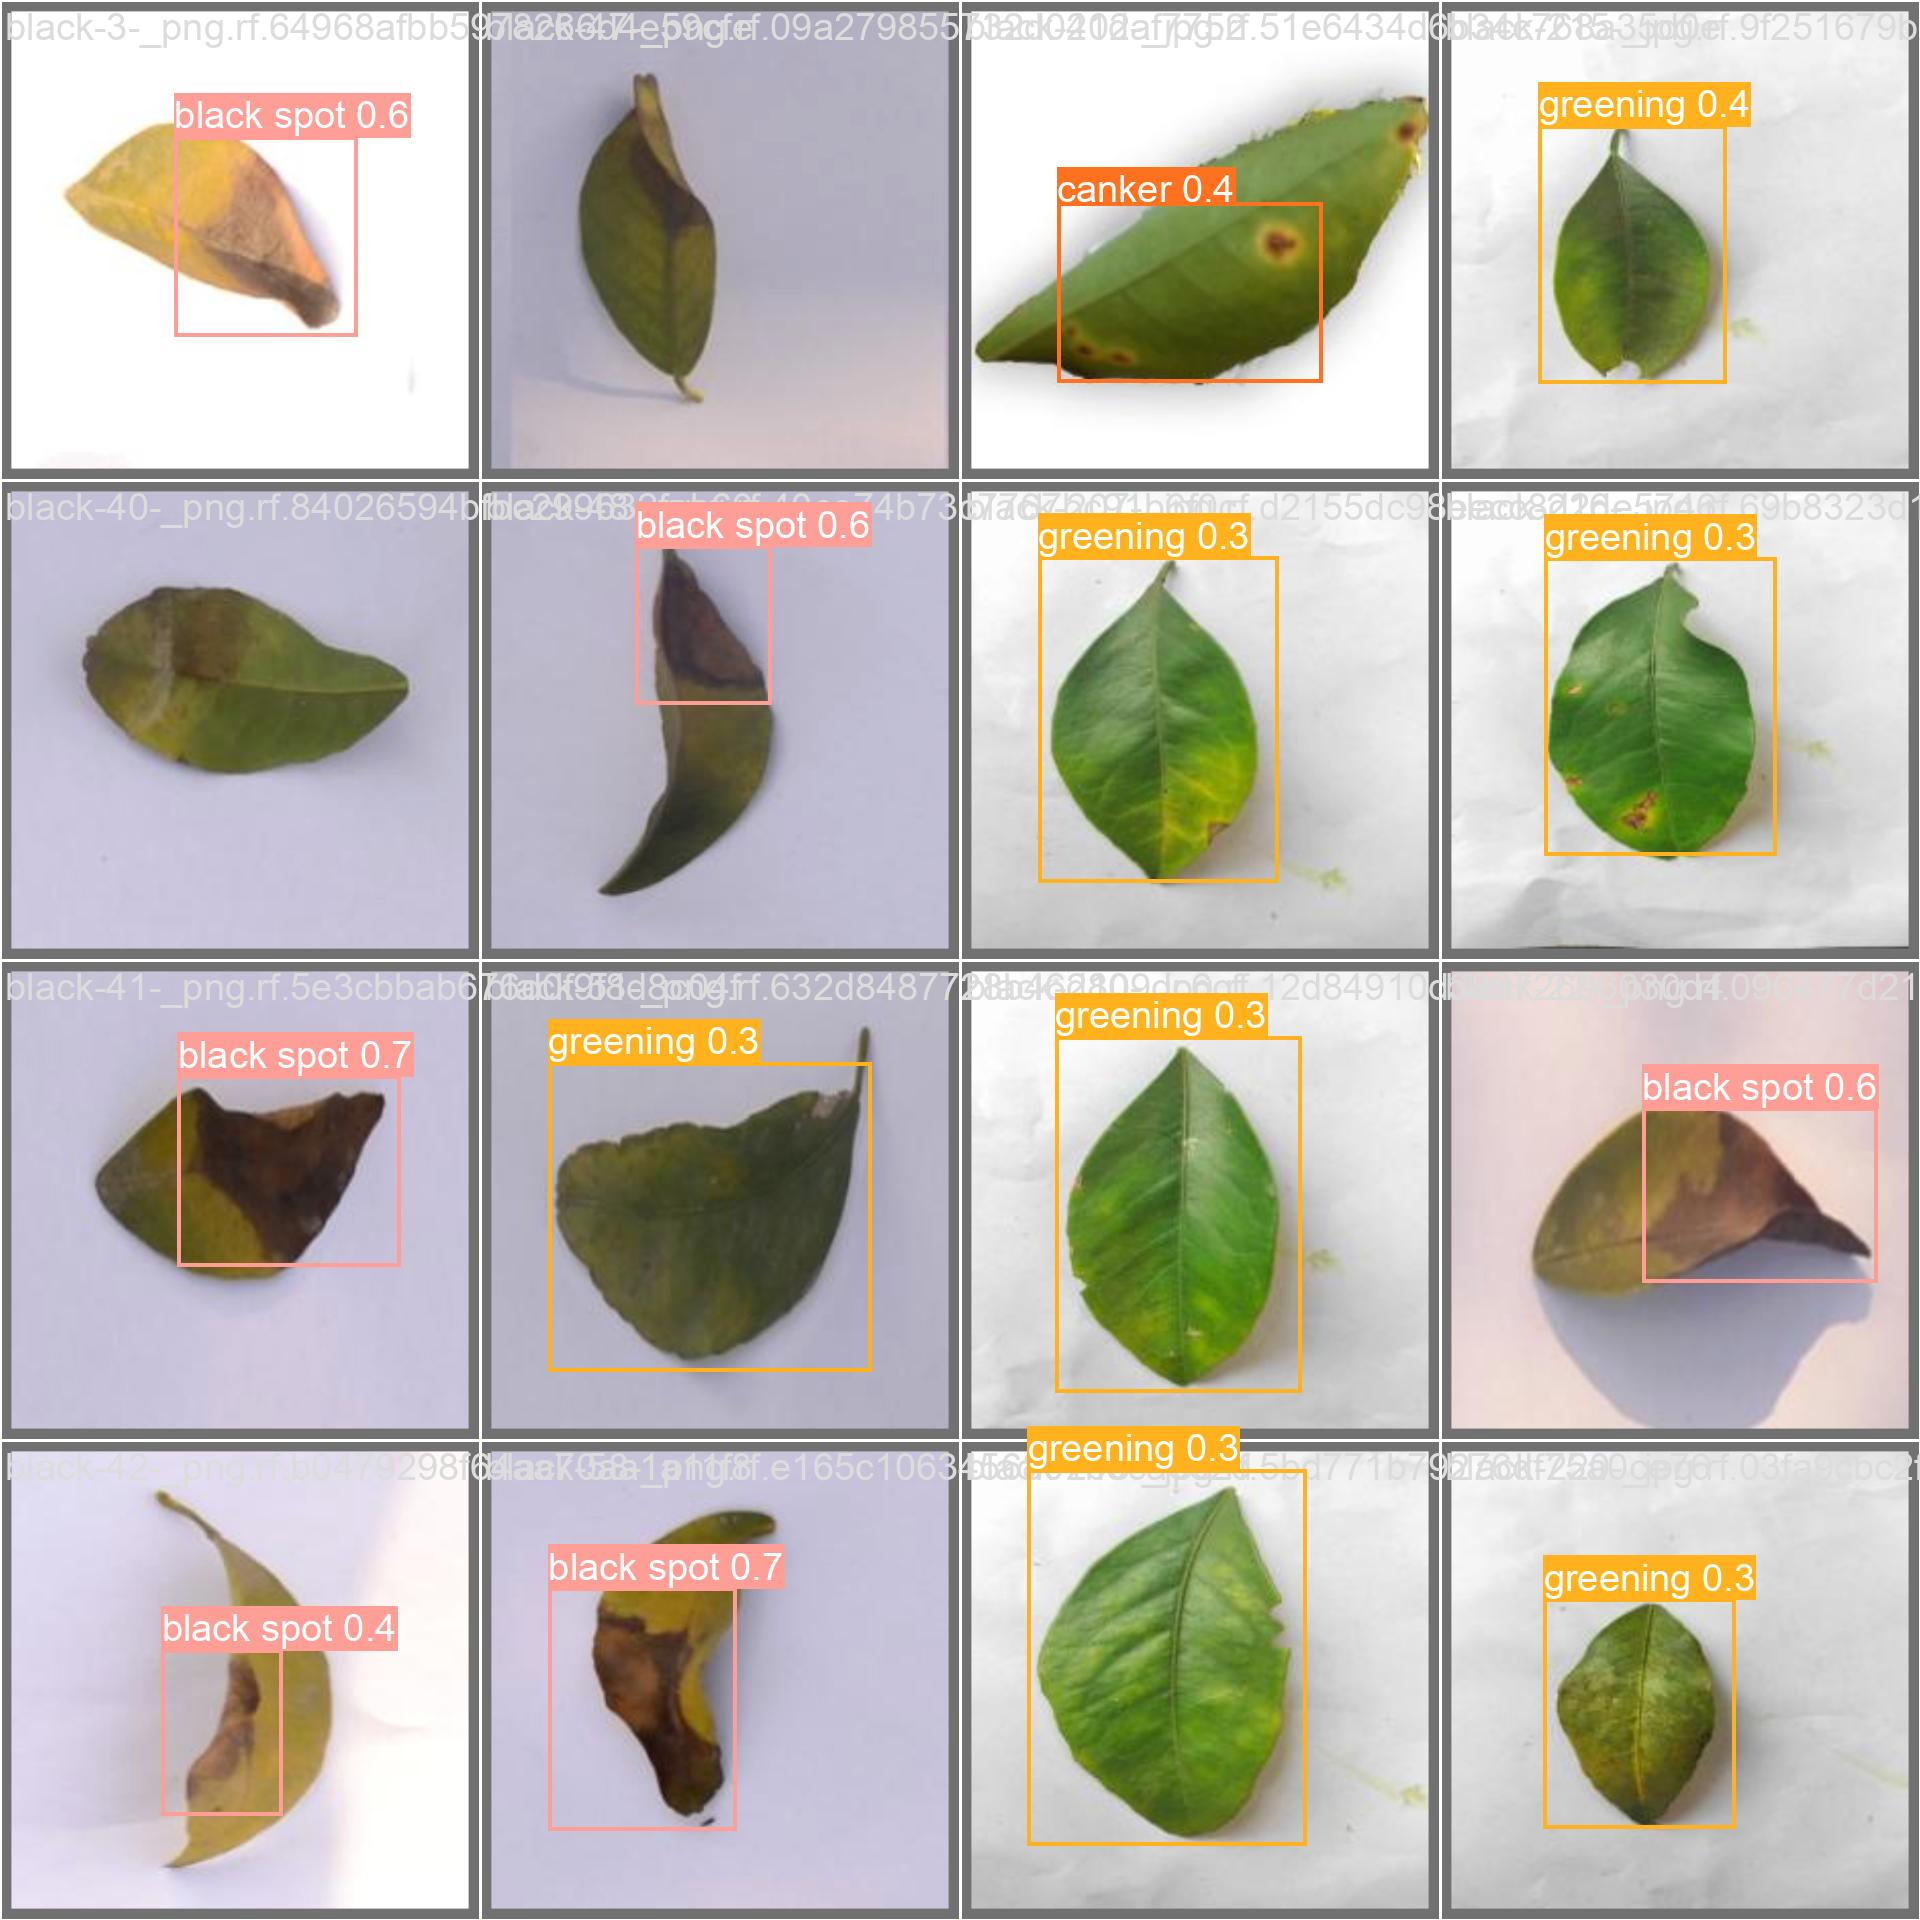

In [16]:
from IPython.display import Image as IPImage

# Display the image with a width of 1000 pixels
IPImage(filename="/content/yolov9/runs/train/exp2/val_batch2_pred.jpg", width=600)

In [17]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data /content/yolov9/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/valid/labels.cache... 657 images, 0 backgrounds, 0 corrupt: 100% 657/657 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 83/83 [00:27<00:00,  3.00it/s]
                   all        657        657      0.563      0.857      0.763      0.396
              Melanose        657          1      0.789          1      0.995   

In [18]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
--source /content/yolov9/valid/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/657 /content/yolov9/valid/images/black-106-_png.rf.a9e136659bd98a938839668bdd893cf1.jpg: 640x640 1 black spot, 51.7ms
image 2/657 /content/yolov9/valid/images/black-108-_png.rf.e7466b43f901de3553e1a13eb62efb8c.jpg: 640x640 1 black spot, 1 greening, 51.7ms
image 3/657 /content/yolov9/valid/images/black-113-_png.rf.07f

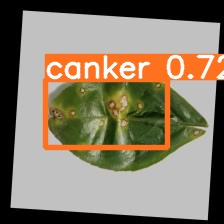

In [19]:
from IPython.display import Image as IPImage

# Display the image with a width of 1000 pixels
IPImage(filename="/content/yolov9/runs/detect/exp2/canker-1022-_jpg.rf.14fb272bd0649f18d2446916a86aeea4.jpg", width=400)